В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [ ]:
# эти модули, вероятнее всего, понадобятся вам в работе
# если в процессе захотите использовать что-то еще, можно добавить
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
from google.colab import drive

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
drive.mount('/content/drive')
jobs = pd.read_csv('/content/drive/MyDrive/monster_com-job_sample.csv')
jobs.sample(100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
10091,United States of America,US,NaN,No,jobs.monster.com,For nearly 70 years Rice Lake Weighing Systems...,Machinist,Full Time,"Rice Lake, WI",Manufacturing - Other,http://jobview.monster.com/Machinist-CNC-Set-u...,NaN,NaN,6b9ecfb35d18b1e6c3d72726186c0a5d
1320,United States of America,US,NaN,No,jobs.monster.com,Job Overview:The Systems Support Analyst will ...,Systems Support Analyst (macys.com) Job in San...,Full Time Employee,"San Francisco, CA",NaN,http://jobview.monster.com/systems-support-ana...,NaN,IT/Software Development,62ba40c200cecea519b904cda08167ea
1995,United States of America,US,NaN,No,jobs.monster.com,GENERAL DESCRIPTIONResponsible for ensuring th...,Production Manager Job in Atlanta,Full Time,"Atlanta, GA 30336",NaN,http://jobview.monster.com/production-manager-...,NaN,Manufacturing/Production/Operations,5c98eb05a9c04f2c8ca30caae77a123b
2441,United States of America,US,NaN,No,jobs.monster.com,"Randstad is seeking energetic, qualified recru...",Recruiting Specialist Job in Clearwater,Full Time Employee,"Clearwater, FL 33755",Staffing/Employment Agencies,http://jobview.monster.com/recruiting-speciali...,"48,000.00 - 60,000.00 $ /year",NaN,2a849497420b3191fb1e6b9d7b71de7b
14500,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job Senior Gameplay ...,CyberCoders Job Application for Senior Gamepla...,"Full Time, Employee","Senior Gameplay EngineerLocation: San Mateo, C...",Computer Software,http://jobview.monster.com/senior-gameplay-eng...,NaN,NaN,4036b1f7c81d6286f9b8a1e4db342e98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,United States of America,US,NaN,No,jobs.monster.com,Job Description Job #: 658160DSP DeveloperApe...,DSP Eng for Wireless Com - Job in Lexington,Full Time Employee,Job Description Job #: 658160DSP DeveloperApe...,Computer/IT Services,http://jobview.monster.com/dsp-eng-for-wireles...,NaN,Experienced (Non-Manager),2f2b628846b759e45acce63f03969d51
7182,United States of America,US,NaN,No,jobs.monster.com,Recognized by Inavero as a Best in Staffing or...,Account Manager - Account Manager/Technical Re...,Full Time Employee,"Norcross, GA 30092",NaN,http://jobview.monster.com/account-manager-acc...,"40,000.00 - 60,000.00 $ /year",NaN,8a1037e355a4ec8338bc1b34de9befaa
17539,United States of America,US,NaN,No,jobs.monster.com,RESPONSIBILITIES:Kforce has multiple needs for...,Catagory Manager - Ent. Solutions Procurement ...,"Full Time, Temporary/Contract/Project","Dallas, TX 75235",NaN,http://jobview.monster.com/Catagory-Manager-En...,NaN,Experienced (Non-Manager),11578cbaa65bb8907ecc912a888eab1a
12221,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job For over 99 year...,CyberCoders Job Application for Product Develo...,"Full Time, Employee",Contact name Danielle Anderson,Other/Not Classified,http://jobview.monster.com/product-development...,NaN,NaN,f9fc7d2b87ea6d220719cdb6ac780422


#### Пустые значения

**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)




country - str - все значения одинаковые

country_code - str - все значения одинаковые

date_added - date - очень много пропущенных

has_expired - str - все значения 'No' и, видимо, тип должен быть bool

job_board - str - все значения одинаковые

job_description - str - помехи ('Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookdale Westlake Hills 1034 Liberty Park Drive Austin...')

job_title - str - помехи ('monster')

job_type - str - пропущенные значения, есть значения с помехами ('Full Time, Employee' или 'Full Time Employee' вместо 'Full Time')

location - str - помехи ('Industrial Designer / CAD Engineer', '23233')

organization - str - много пропущенных, помехи ('Other/Not Classified')

page_url - url(str) - без проблем

salary - str - очень много пропущенных, данные должны быть в формате money(или int), местами указаны зарплаты за разные отрезки времени (зарплата в месяц или зарплата в год)

sector - str - много пропущенных

uniq_id - key(str) - без проблем



Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

<Axes: >

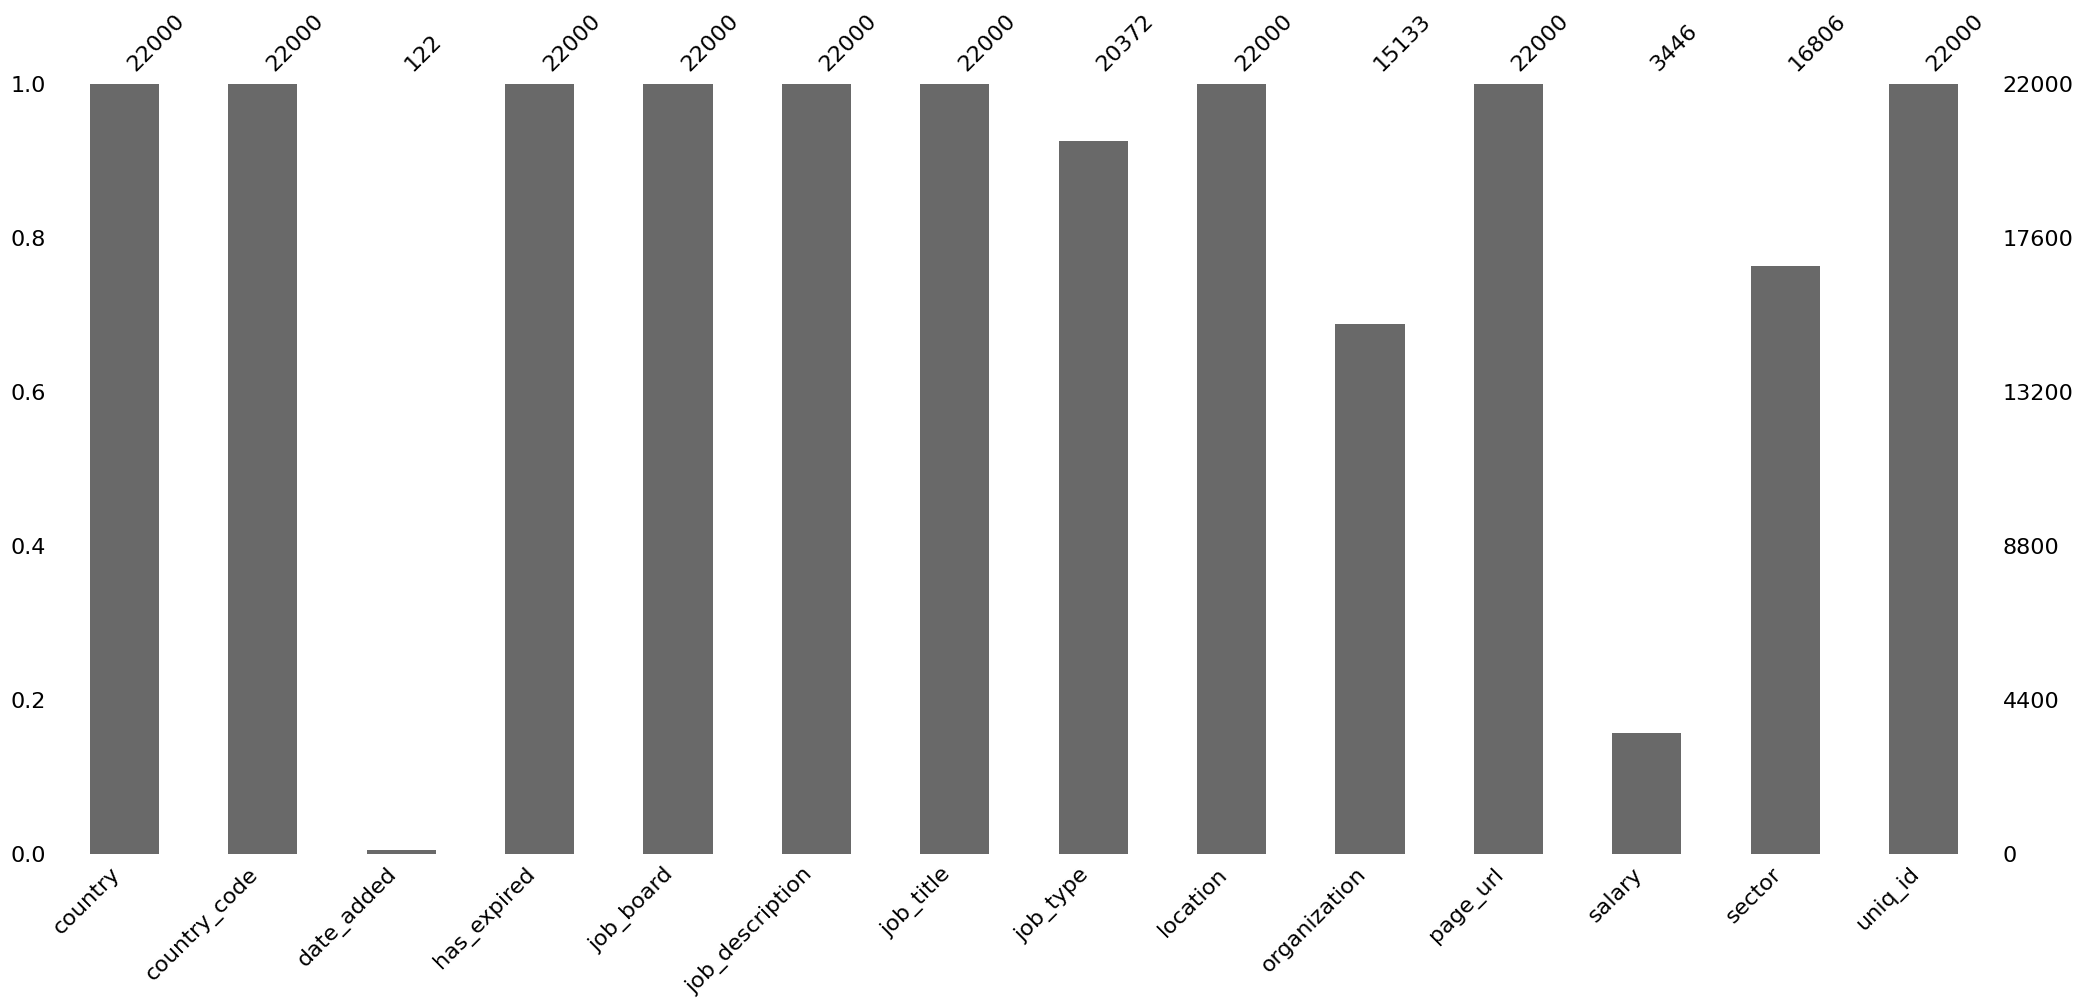

In [ ]:
msno.bar(jobs) # непустые значения по столбцам

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
jobs.dropna()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
279,United States of America,US,6/10/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Insurance Sales - Customer Service Job in Eden...,Full Time Employee,"Eden Prairie, MN 55344",Insurance,http://jobview.monster.com/insurance-sales-cus...,15.00 - 21.00 $ /hour,Accounting/Finance/Insurance,64a597e5dd17740aadf4b0e8047b51a5
7419,United States of America,US,4/27/2016,No,jobs.monster.com,A CUSTOMER SERVICE JOB … that might become a c...,Customer Service Representative Job in Las Vegas,Full Time Employee,"Las Vegas, NV 89129",Business Services - Other,http://jobview.local-jobs.monster.com/Customer...,$10.50+ /hour,Customer Support/Client Care,7baad80eae733c2518f0a500609c1e90
17048,United States of America,US,8/5/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Licensed Insurance Sales Assistant (Customer S...,Full Time Employee,"Covington, GA",Insurance,http://jobview.monster.com/licensed-insurance-...,$10.50+ /hour,Sales/Retail/Business Development,c486cae7c4c1105a85e50448fb9c0dd0
17052,United States of America,US,8/2/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Customer Service Agent / Insurance Sales Assis...,Full Time Employee,"Alpharetta, GA 30009",Insurance,http://jobview.monster.com/customer-service-ag...,11.00 - 15.00 $ /hour,Sales/Retail/Business Development,6ddfdf91eb991d9d31f3cd2ee4492eb9
18709,United States of America,US,3/11/2016,No,jobs.monster.com,There's No Place Like The Neighborhood!It's a ...,Restaurant Manager - Applebee's Parsippany,"Full Time, Employee","Parsippany, NJ 07054",Restaurant/Food Services,http://jobview.monster.com/Restaurant-Manager-...,50.00 - 65.00 $ /year,Food Services/Hospitality,4fb8c68e3b6efcec902801a96f2cb004


**При удалении строк с пустыми знаечниями остается 5 строк, что недостаточно для анализа**

Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?

Столбцы country, country_code, has_expired, job_board имеют по одному уникальному значению. В анализе данных им можно не использовать.

2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?

В столбце job_description можно встретить информацию из job_title, job_type, location, organization, salary и sector. Значит, job_description большого значения не имеет.

3. Какие столбцы содержательно нерелевантны? Обоснуйте.

Содержательно нерелевантным является столбец date_added, так как имеет слишком много пропусков, поэтому его можно опустить. Помимо этого, столбцы page_url и uniq_id не несут никакой полезной информации для анализа.

#### Дублирование данных

В данных есть строки с разными айди, но полностью совпадающие по всем другим колонкам.

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

***Однозначно идентифицировать запись в датасете можно, используя совокупность столбцов job_title, job_type, location, organization***

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

***Характеристики датасета меняются незначительно.***

### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [ ]:
jobscopy = jobs.copy(deep=True) # создание копии датасета

In [ ]:
# Удаление строк или столбцы с пустыми ячейками
jobscopy = jobscopy.drop(labels=['country', 'country_code', 'has_expired', 'job_board'], axis=1)
jobscopy

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...,...,...,...,...,...,...
21995,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640
21996,NaN,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de
21997,NaN,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345
21998,NaN,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b


In [ ]:
# Удаление нерелевантных столбцов
jobscopy = jobscopy.drop(labels=['date_added', 'page_url', 'uniq_id', 'job_description'], axis=1)
jobscopy

,job_title,job_type,location,organization,salary,sector
0,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development
1,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN
2,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN
3,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager)
4,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management
...,...,...,...,...,...,...
21995,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN
21996,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff)
21997,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN
21998,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair


In [ ]:
# Удаление дубликатов
jobscopy = jobscopy.drop_duplicates(subset=['job_title', 'job_type', 'location', 'organization'])
jobscopy

,job_title,job_type,location,organization,salary,sector
0,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development
1,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN
2,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN
3,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager)
4,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management
...,...,...,...,...,...,...
21995,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN
21996,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff)
21997,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN
21998,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair


#### Обработка колонки location

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

In [ ]:
def replace_address(loc):
  if 'Address' in loc:
    return re.sub(r'Address\s*', '', loc)
  return loc

reg1 = r'^([a-zA-Z\s]){1,20},\s*[A-Z]{2}\s*$' #проверить
reg2 = r'^([a-zA-Z\s]){1,20},\s*[A-Z]{2}\s*\d{5}\s*$' #проверить
reg3 = r'^([a-zA-Z\s]){1,20}\s*\d{5}\s*$' #проверить
format1, format2, format3 = 0, 0, 0
jobscopy['location'] = jobscopy['location'].transform(replace_address)
for loc in jobscopy['location']:
  if re.search(reg2, loc):
    format2 += 1
  elif re.search(reg1, loc):
    format1 += 1
  elif re.search(reg3, loc):
    format3 += 1
print(format1, format2, format3)

6036 10657 318


<ipython-input-62-3b6b207efc9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobscopy['location'] = jobscopy['location'].transform(replace_address)


На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

<BarContainer object of 3 artists>

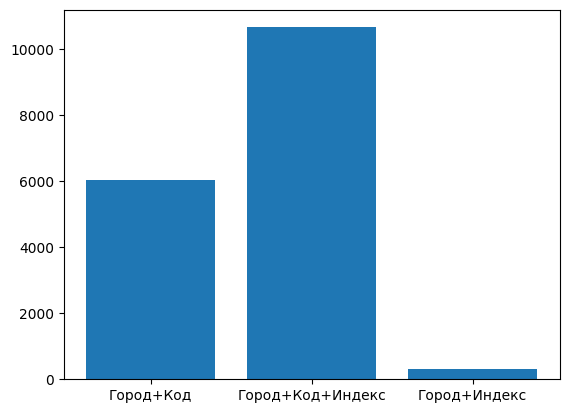

In [ ]:
plt.bar(x=['Город+Код', 'Город+Код+Индекс', 'Город+Индекс'], height=[format1, format2, format3])

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
def valid_loc(loc):
  if re.search(reg1, loc) or re.search(reg2, loc) or re.search(reg2, loc):
    return True
  return False

def not_valid_loc(loc):
  return not(valid_loc(loc))

loc_not_valid = jobscopy[jobscopy.location.map(not_valid_loc)]
loc_not_valid

,job_title,job_type,location,organization,salary,sector
2,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN
6,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,NaN,NaN
16,Horizontal Construction Engineers Job in Wades...,NaN,Wadesboro 28170,NaN,NaN,Civil & Structural EngineeringGeneral/Other: E...
22,Combat Engineer - Construction and Engineering...,NaN,La Porte 46350,NaN,NaN,General/Other: Engineering
29,Sr. Process Engineer,Full Time Employee,"Sr. Process Engineer, Manufacturing","Chicago, IL","70,000.00 - 100,000.00 $ /year",Engineering
...,...,...,...,...,...,...
21899,Associate Customer Business Manager Job in Cin...,Full Time Employee,Associate Customer Business Manager Location: ...,NaN,NaN,Sales/Retail/Business Development
21933,Operations Manager Job in Cincinnati,Full Time Employee,Location:,Construction - Industrial Facilities and Infra...,NaN,Business/Strategic Management
21944,Maintenance Planner Job in Cincinnati,Full Time Employee,Maintenance Planner-16150DescriptionLocation: ...,NaN,NaN,Other
21967,General Laborer Job in Cincinnati,Full Time Employee,Location:,All,NaN,Installation/Maintenance/Repair


In [ ]:
jobscopy = jobscopy[jobscopy.location.map(valid_loc)]
jobscopy

,job_title,job_type,location,organization,salary,sector
0,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development
1,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN
3,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager)
4,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management
5,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,NaN,Experienced (Non-Manager)
...,...,...,...,...,...,...
21995,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN
21996,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff)
21997,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN
21998,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair


In [ ]:
def city(loc):
  if str(loc) == 'nan':
    return np.nan
  temp = re.search(reg2, loc)
  if temp:
    return re.split(r'\s*,\s*', temp.group())[0]
  temp = re.search(reg1, loc)
  if temp:
    return re.split(r'\s*,\s*', temp.group())[0]
  temp = re.search(reg3, loc)
  if not temp:
    return np.nan
  t = re.split(r'\s+', temp.group())
  if len(' '.join(t[0%-1])) == 2:
    return np.nan
  return ' '.join(t[0:-1])


def code(loc):
  if str(loc) == 'nan':
    return np.nan
  temp = re.search(reg2, loc)
  if temp:
    return re.split(r'\s+', re.split(r'\s*,\s*', temp.group())[1])[0]
  temp = re.search(reg1, loc)
  if temp:
    return re.split(r'\s*,\s*', temp.group())[1]
  temp = re.search(reg3, loc)
  if not temp:
    return np.nan
  t = re.split(r'\s+', temp.group())
  if len(' '.join(t[0:-1])) == 2:
    return t[0]
  return np.nan

def index(loc):
  if str(loc) == 'nan':
    return np.nan
  temp = re.search(reg2, loc)
  if temp:
    return re.split(r'\s+', re.split(r'\s*,\s*', temp.group())[1])[-1]
  temp = re.search(reg3, loc)
  if temp:
    return re.split(r'\s+',temp.group())[-1]
  return np.nan


jobscopy['city'] = jobscopy['location'].transform(city)
jobscopy['code'] = jobscopy['location'].transform(code)
jobscopy['index'] = jobscopy['location'].transform(index)
jobscopy



<ipython-input-66-210e24305be8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobscopy['city'] = jobscopy['location'].transform(city)
<ipython-input-66-210e24305be8>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobscopy['code'] = jobscopy['location'].transform(code)
<ipython-input-66-210e24305be8>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,job_title,job_type,location,organization,salary,sector,city,code,index
0,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,Madison,WI,53702
1,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,Madison,WI,53708
3,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager),Dixon,CA,NaN
4,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management,Camphill,PA,NaN
5,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,NaN,Experienced (Non-Manager),Charlottesville,VA,NaN
...,...,...,...,...,...,...,...,...,...
21995,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,OH,NaN
21996,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),Cincinnati,OH,45236
21997,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,NaN,NaN,Chicago,IL,60602
21998,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,IL,60609


Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Ячейку, в которую невозможно поместить значение, оставьте пустой.

In [ ]:
loc_not_valid['city'] = loc_not_valid['organization'].transform(city)
loc_not_valid['code'] = loc_not_valid['organization'].transform(code)
loc_not_valid['index'] = loc_not_valid['organization'].transform(index)

jobscopy = pd.concat([jobscopy, loc_not_valid[loc_not_valid.city.map(lambda x: True if str(x) != 'nan' else False)]])
loc_not_valid = loc_not_valid[loc_not_valid.city.map(lambda x: True if str(x) == 'nan' else False)]
loc_not_valid

<ipython-input-67-57da4fcbf8c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_not_valid['city'] = loc_not_valid['organization'].transform(city)
<ipython-input-67-57da4fcbf8c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_not_valid['code'] = loc_not_valid['organization'].transform(code)
<ipython-input-67-57da4fcbf8c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,job_title,job_type,location,organization,salary,sector,city,code,index
2,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,NaN,NaN,NaN
6,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,NaN,NaN,NaN,NaN,NaN
16,Horizontal Construction Engineers Job in Wades...,NaN,Wadesboro 28170,NaN,NaN,Civil & Structural EngineeringGeneral/Other: E...,NaN,NaN,NaN
22,Combat Engineer - Construction and Engineering...,NaN,La Porte 46350,NaN,NaN,General/Other: Engineering,NaN,NaN,NaN
44,Combat Engineer - Construction and Engineering...,NaN,"Bradford, Vt 05033",NaN,NaN,General/Other: Engineering,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21899,Associate Customer Business Manager Job in Cin...,Full Time Employee,Associate Customer Business Manager Location: ...,NaN,NaN,Sales/Retail/Business Development,NaN,NaN,NaN
21933,Operations Manager Job in Cincinnati,Full Time Employee,Location:,Construction - Industrial Facilities and Infra...,NaN,Business/Strategic Management,NaN,NaN,NaN
21944,Maintenance Planner Job in Cincinnati,Full Time Employee,Maintenance Planner-16150DescriptionLocation: ...,NaN,NaN,Other,NaN,NaN,NaN
21967,General Laborer Job in Cincinnati,Full Time Employee,Location:,All,NaN,Installation/Maintenance/Repair,NaN,NaN,NaN


In [ ]:
reg1 = r'(((St\.)|(Ft\.)|(Mt\.)|(N\.))\s?)?([A-Z]{1}([A-Z]{1,15}|[a-z]{1,15}))(\s([A-Z]{1}([A-Z]{1,15}|[a-z]{1,15}))){0,3}\s?,\s*(([A-Z]{2}(\sUS)?)|(Vt))\s'
reg2 = r'(((St\.)|(Ft\.)|(Mt\.)|(N\.))\s?)?([A-Z]{1}([A-Z]{1,15}|[a-z]{1,15}))(\s([A-Z]{1}([A-Z]{1,15}|[a-z]{1,15}))){0,3}\s?,\s*(([A-Z]{2}(\sUS)?)|(Vt))\s\d{5}'
reg3 = r'(((St\.)|(Ft\.)|(Mt\.)|(N\.))\s?)?([A-Z]{1}([A-Z]{1,15}|[a-z]{1,15}))(\s([A-Z]{1}([A-Z]{1,15}|[a-z]{1,15}))){0,3}\s\d{5}'
loc_not_valid['city'] = loc_not_valid['location'].transform(city)
loc_not_valid['code'] = loc_not_valid['location'].transform(code)
loc_not_valid['index'] = loc_not_valid['location'].transform(index)
jobscopy = pd.concat([jobscopy, loc_not_valid[loc_not_valid.city.map(lambda x: True if str(x) != 'nan' else False)]])
jobscopy = pd.concat([jobscopy, loc_not_valid[loc_not_valid.code.map(lambda x: True if str(x) != 'nan' else False)]])
jobscopy = pd.concat([jobscopy, loc_not_valid[loc_not_valid.index.map(lambda x: True if str(x) != 'nan' else False)]])
jobscopy = jobscopy.drop_duplicates(subset=['job_title', 'job_type', 'location', 'organization'])
loc_not_valid = loc_not_valid[loc_not_valid.city.map(lambda x: True if str(x) == 'nan' else False)]
loc_not_valid = loc_not_valid[loc_not_valid.code.map(lambda x: True if str(x) == 'nan' else False)]
loc_not_valid = loc_not_valid[loc_not_valid.index.map(lambda x: True if str(x) == 'nan' else False)]
loc_not_valid

<ipython-input-68-4f085e1cfcf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_not_valid['city'] = loc_not_valid['location'].transform(city)
<ipython-input-68-4f085e1cfcf7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_not_valid['code'] = loc_not_valid['location'].transform(code)
<ipython-input-68-4f085e1cfcf7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,job_title,job_type,location,organization,salary,sector,city,code,index


In [ ]:
jobscopy = jobscopy.drop(labels='location', axis = 1)
jobscopy

,job_title,job_type,organization,salary,sector,city,code,index
0,IT Support Technician Job in Madison,Full Time Employee,NaN,NaN,IT/Software Development,Madison,WI,53702
1,Business Reporter/Editor Job in Madison,Full Time,Printing and Publishing,NaN,NaN,Madison,WI,53708
3,Engineer - Quality Job in Dixon,Full Time,Altec Industries,NaN,Experienced (Non-Manager),Dixon,CA,NaN
4,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,Retail,NaN,Project/Program Management,Camphill,PA,NaN
5,Construction PM - Charlottesville Job in Charl...,Full Time Employee,Computer/IT Services,NaN,Experienced (Non-Manager),Charlottesville,VA,NaN
...,...,...,...,...,...,...,...,...
21889,Claims Appraiser II,Full Time Employee,Insurance,NaN,Accounting/Finance/Insurance,NaN,NaN,NaN
21933,Operations Manager Job in Cincinnati,Full Time Employee,Construction - Industrial Facilities and Infra...,NaN,Business/Strategic Management,NaN,NaN,NaN
21944,Maintenance Planner Job in Cincinnati,Full Time Employee,NaN,NaN,Other,NaN,NaN,NaN
21967,General Laborer Job in Cincinnati,Full Time Employee,All,NaN,Installation/Maintenance/Repair,NaN,NaN,NaN


#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
jobscopy.salary.sample(10)

1417                           NaN
9135                           NaN
7817                           NaN
4900                           NaN
16019                          NaN
21219                          NaN
10796                          NaN
6318                           NaN
16218    0.00 - 160,000.00 $ /year
1583                           NaN
Name: salary, dtype: object

У вас должны получиться следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Напишем регулярные выражения, обобщающие эти форматы.

<BarContainer object of 6 artists>

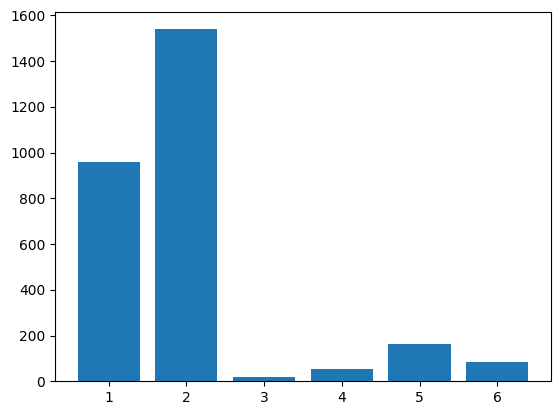

In [ ]:
reg1 = r'\d+\.\d{2}\s+-\s+\d+\.\d{2}\s+\$?\s+/hour'
reg2 = r'\d+(,\d{3}){0,2}\.\d{2}\s+-\s+\d+(,\d{3}){0,2}\.\d{2}\s+\$?\s+/year'
reg3 = r'\d+(,\d{3}){0,2}\.\d{2}\s+-\s+\d+(,\d{3}){0,2}\.\d{2}\s+\$?\s+/month'
reg4 = r'\$?\d+(,\d{3}){0,2}\.\d{2}\s+/((year)|(hour)|(month))'
reg5 = r'\$?\d+(,\d{3}){0,2}\.\d{2}\+\s+/((year)|(hour)|(month))'
reg6 = r'Up\s+to\s+\$?\d+(,\d{3}){0,2}\.\d{2}'

f1, f2, f3, f4, f5, f6 = 0, 0, 0, 0, 0, 0
for sal in jobscopy.salary:
  if str(sal) == 'nan':
    continue
  if re.search(reg1, sal):
    f1 += 1
  elif re.search(reg2, sal):
    f2 += 1
  elif re.search(reg3, sal):
    f3 += 1
  elif re.search(reg4, sal):
    f4 += 1
  elif re.search(reg5, sal):
    f5 += 1
  elif re.search(reg6, sal):
    f6 += 1

plt.bar(x=['1', '2', '3', '4', '5', '6'], height = [f1, f2, f3, f4, f5, f6])

Вы наверняка заметили, что есть записи для зарплаты в год и в час без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график (удобнее всего гистограмму), чтобы оценить значения в каждой из двух категорий.

In [ ]:
jobscopy[jobscopy.salary.map(lambda x: True if str(x) != 'nan' and '/hour' in x else False)].sample(10)

,job_title,job_type,organization,salary,sector,city,code,index
4514,Quality Engineer - Medical Device/Manufacturin...,Full Time Temporary/Contract/Project,NaN,39.00 - 55.00 $ /hour,NaN,Raynham,MA,02767
7387,Inside Sales Consultant - Call Center Job in L...,"Full Time, Employee",BankingReal Estate/Property ManagementRental S...,15.00 - 15.00 $ /hour,Sales/Retail/Business Development,Las Vegas,NV,89119
767,Deputy Sheriff Job in Winona,Part Time,NaN,22.01 - 30.29 $ /hour,NaN,Winona,MN,55987
6932,General Laboratory Technician - Brady Corporat...,Full Time Employee,Manufacturing - Other,17.00 - 18.00 $ /hour,NaN,Milwaukee,WI,53223
7261,Shipping/Receiving Clerk Job in Smyrna,Full Time Employee,Other/Not Classified,11.00 - 13.00 $ /hour,NaN,Smyrna,GA,30080
13887,Quality Engineer - Manufacturing/Automotive Co...,Full Time Temporary/Contract/Project,NaN,35.00 - 44.50 $ /hour,NaN,Louisville,KY,40202
3869,Manufacturing Positions Job in Clinton,Full Time Employee,Manufacturing - Other,11.00 - 15.00 $ /hour,NaN,Clinton,TN,37716
11094,Machine Operator & Assemblers and Welders Job ...,Full Time Employee,Other/Not Classified,12.50 - 13.00 $ /hour,NaN,Menomonee Falls,WI,53051
14996,Food and Beverage Servers Job in Kansas City,Employee,All,$9.00+ /hourTips,Entry Level,Kansas City,KS,66101
21460,Property Accountant Job in Chicago,Full Time Employee,NaN,20.00 - 25.00 $ /hour,Accounting/Finance/Insurance,Chicago,IL,60602


Сделайте выводы по графику и выведите правило определения, за какой период времени указана зарплата. Проверьте, что ничего не упустили.

In [ ]:
def upto(x):
  if str(x) == 'nan':
    return np.nan
  if not re.search(reg6, x):
    return x
  sal = x[x.index('$')+1:].split(' ')[0]
  sal = float(sal)
  if sal < 200:
    return f'Up to ${sal:.2f} /hour'
  return f'Up to ${sal:.2f} /year'

jobscopy['salary'] = jobscopy['salary'].transform(upto)
jobscopy[jobscopy.salary.map(lambda x: True if str(x) != 'nan' and 'Up to' in x else False)]

,job_title,job_type,organization,salary,sector,city,code,index
42,Office Administrator - Job in Denver,Full Time,Other/Not Classified,Up to $32000.00 /year,Experienced (Non-Manager),Denver,CO,80237
154,Entry Level Administrative Assistant with Oppo...,Full Time,Other/Not Classified,Up to $45000.00 /year,Experienced (Non-Manager),Denver,CO,80202
2630,Medical Admin- FRONT Office - up to $/hr Job i...,Temporary/Contract/Project,Other/Not Classified,Up to $18.00 /hour,Experienced (Non-Manager),Los Angeles,CA,90068
2639,Medical Scheduling AND Authorizations Represen...,Full Time,Other/Not Classified,Up to $13.00 /hour,Experienced (Non-Manager),Lakeland,FL,33801
2655,Medical Receptionist Job in Tarpon Springs,Full Time,Other/Not Classified,Up to $14.00 /hour,Experienced (Non-Manager),Tarpon Springs,FL,34688
...,...,...,...,...,...,...,...,...
13966,Production Lead Job in Oxnard,NaN,Other/Not Classified,Up to $15.00 /hour,Experienced (Non-Manager),Oxnard,CA,93030
14067,Regulatory Affairs Coordinator -$,Full Time,Other/Not Classified,Up to $52000.00 /year,Experienced (Non-Manager),Gardena,CA,90247
21168,Payroll Processor Job in Maitland,Full Time,Other/Not Classified,Up to $20.00 /hour,Experienced (Non-Manager),Maitland,FL,32751
21270,Software Support - Great Opportunity Job in Wi...,Full Time,Other/Not Classified,Up to $31500.00 /year,Experienced (Non-Manager),Wilmington,DE,19801


**Что мы можем увидеть?**

Зарплата также может быть указана в месяц (month) и в неделю (week) – учтите это при составлении общего регулярного выражения.

Также в начале некоторых строк есть лишние пробелы, которые мы также учитываем.

Разделим столбец `salary` на зарплаты от, до, временной интервал (час, месяц, год) и бонусы. Для строк не попавших ни в одну категорию или с NaN в колонке salary установим все как NaN.

Также добавим колонку которая разделяет тип предложений (от-до, от, до, нет).

In [ ]:
jobscopy['salary_period'] = ''
jobscopy['salary_type'] = ''
jobscopy['salary_from'] = ''
jobscopy['salary_to'] = ''
jobscopy['salary_bonus'] = ''

for row in jobscopy.iterrows():
  sal = str(row[1].salary)
  i = row[0]
  sal = sal.replace(' ', '')
  sal_reg = r'([Uu]pto)?\$?\d+(,\d{3})?\.\d{2}(-\d+(,\d{3})?\.\d{2})?\$?\+?((/hour)|(/day)|(/week)|(/month)|(/year))?'
  sal = re.search(sal_reg, sal)

  if sal:

    sal = sal[0]
    period = re.search(r'(/hour)|(/day)|(/week)|(/month)|(/year)', sal)
    if period:
      jobscopy.at[i, 'salary_period'] = period[0][1:]
    else:
      jobscopy.at[i, 'salary_period'] = np.nan

    if 'upto' in sal or 'Upto' in sal:
      money = re.search(r'\d+(,\d{3})?\.\d{2}', sal)
      jobscopy.at[i, 'salary_type'] = 'up to'
      jobscopy.at[i, 'salary_from'] = np.nan
      jobscopy.at[i, 'salary_to'] = float(money[0].replace(',', ''))

    else:
      money = [x[0] for x in re.finditer(r'\d+(,\d{3})?\.\d{2}', sal)]

      if len(money) == 1:
        if '+' in sal:
          jobscopy.at[i, 'salary_type'] = 'from'
        else:
          jobscopy.at[i, 'salary_type'] = np.nan
        jobscopy.at[i, 'salary_from'] = float(money[0].replace(',', ''))
        jobscopy.at[i, 'salary_to'] = np.nan

      if len(money) >= 2:
          jobscopy.at[i, 'salary_type'] = 'from-to'
          jobscopy.at[i, 'salary_from'] = float(money[0].replace(',', ''))
          jobscopy.at[i, 'salary_to'] = float(money[1].replace(',', ''))
          if len(money) > 2:
            jobscopy.at[i, 'salary_bonus'] = float(money[2].replace(',', ''))

    if 'bonus' in sal.lower():
      percents = re.search(r'\d+%', sal)
      if percents:
        jobscopy.at[i, 'salary_bonus'] = percents[0]
      else:
        jobscopy.at[i, 'salary_bonus'] = np.nan
    else:
      jobscopy.at[i, 'salary_bonus'] = np.nan

  else:
    jobscopy.at[i, 'salary_period'] = np.nan
    jobscopy.at[i, 'salary_type'] = np.nan
    jobscopy.at[i, 'salary_from'] = np.nan
    jobscopy.at[i, 'salary_to'] = np.nan
    jobscopy.at[i, 'salary_bonus'] = np.nan

jobscopy = jobscopy.drop(columns='salary')
jobscopy

,job_title,job_type,organization,sector,city,code,index,salary_period,salary_type,salary_from,salary_to,salary_bonus
0,IT Support Technician Job in Madison,Full Time Employee,NaN,IT/Software Development,Madison,WI,53702,NaN,NaN,NaN,NaN,NaN
1,Business Reporter/Editor Job in Madison,Full Time,Printing and Publishing,NaN,Madison,WI,53708,NaN,NaN,NaN,NaN,NaN
3,Engineer - Quality Job in Dixon,Full Time,Altec Industries,Experienced (Non-Manager),Dixon,CA,NaN,NaN,NaN,NaN,NaN,NaN
4,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,Retail,Project/Program Management,Camphill,PA,NaN,NaN,NaN,NaN,NaN,NaN
5,Construction PM - Charlottesville Job in Charl...,Full Time Employee,Computer/IT Services,Experienced (Non-Manager),Charlottesville,VA,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21889,Claims Appraiser II,Full Time Employee,Insurance,Accounting/Finance/Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21933,Operations Manager Job in Cincinnati,Full Time Employee,Construction - Industrial Facilities and Infra...,Business/Strategic Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21944,Maintenance Planner Job in Cincinnati,Full Time Employee,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21967,General Laborer Job in Cincinnati,Full Time Employee,All,Installation/Maintenance/Repair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
jobscopy.job_type.drop_duplicates()

0                                   Full Time Employee
1                                            Full Time
8                                   Part Time Employee
9                                                  NaN
17                                 Full Time, Employee
21                Full Time Temporary/Contract/Project
82                                Full Time , Employee
90               Full Time, Temporary/Contract/Project
129                                           Employee
151                                Part Time, Employee
178                                   Full Time Intern
231                         Temporary/Contract/Project
250                               Full Time / Employee
257             Full Time , Temporary/Contract/Project
265                                          Part Time
364                                 Per Diem, Employee
374                        Job Type Full Time Employee
610                                           Per Diem
984       

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
def job_time(job):
  if str(job) == 'nan':
    return 'Full Time'
  if 'Part Time' in job:
    return 'Part Time'
  if 'Per Diem' in job:
    return 'Per Diem'
  return 'Full Time'

def job_long(job):
  if str(job) == 'nan':
    return 'Employee'
  if 'Temporary/Contract/Project' in job:
    return 'Temporary/Contract/Project'
  if 'Intern' in job:
    return 'Intern'
  if 'Seasonal' in job:
    return 'Seasonal'
  if 'Exempt' in job:
    return 'Exempt'
  return 'Employee'

def job_type_format(job):
  if str(job) == 'nan':
    return np.nan
  return job_time(job) + ' ' + job_long(job)

jobscopy['job_type'] = jobscopy['job_type'].transform(job_type_format)
jobscopy

,job_title,job_type,organization,sector,city,code,index,salary_period,salary_type,salary_from,salary_to,salary_bonus
0,IT Support Technician Job in Madison,Full Time Employee,NaN,IT/Software Development,Madison,WI,53702,NaN,NaN,NaN,NaN,NaN
1,Business Reporter/Editor Job in Madison,Full Time Employee,Printing and Publishing,NaN,Madison,WI,53708,NaN,NaN,NaN,NaN,NaN
3,Engineer - Quality Job in Dixon,Full Time Employee,Altec Industries,Experienced (Non-Manager),Dixon,CA,NaN,NaN,NaN,NaN,NaN,NaN
4,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,Retail,Project/Program Management,Camphill,PA,NaN,NaN,NaN,NaN,NaN,NaN
5,Construction PM - Charlottesville Job in Charl...,Full Time Employee,Computer/IT Services,Experienced (Non-Manager),Charlottesville,VA,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21889,Claims Appraiser II,Full Time Employee,Insurance,Accounting/Finance/Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21933,Operations Manager Job in Cincinnati,Full Time Employee,Construction - Industrial Facilities and Infra...,Business/Strategic Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21944,Maintenance Planner Job in Cincinnati,Full Time Employee,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21967,General Laborer Job in Cincinnati,Full Time Employee,All,Installation/Maintenance/Repair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

In [ ]:
jobscopy['jobs_time'] = jobscopy['job_type'].transform(job_time)
jobscopy['jobs_employment'] = jobscopy['job_type'].transform(job_long)
jobscopy = jobscopy.drop(columns = 'job_type')
jobscopy

,job_title,organization,sector,city,code,index,salary_period,salary_type,salary_from,salary_to,salary_bonus,jobs_time,jobs_employment
0,IT Support Technician Job in Madison,NaN,IT/Software Development,Madison,WI,53702,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
1,Business Reporter/Editor Job in Madison,Printing and Publishing,NaN,Madison,WI,53708,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
3,Engineer - Quality Job in Dixon,Altec Industries,Experienced (Non-Manager),Dixon,CA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
4,Shift Supervisor - Part-Time Job in Camphill,Retail,Project/Program Management,Camphill,PA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
5,Construction PM - Charlottesville Job in Charl...,Computer/IT Services,Experienced (Non-Manager),Charlottesville,VA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21889,Claims Appraiser II,Insurance,Accounting/Finance/Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21933,Operations Manager Job in Cincinnati,Construction - Industrial Facilities and Infra...,Business/Strategic Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21944,Maintenance Planner Job in Cincinnati,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21967,General Laborer Job in Cincinnati,All,Installation/Maintenance/Repair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee


Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

In [ ]:
def remove_loc(title):
  if re.search(r'\s+in\s*', title):
    return re.split(r'\s+in', title)[0]
  return title

def remove_other(title):
  if '-' in title:
    return re.split(r'\s*-\s*', title)[0]
  elif 'Job' in title:
    return re.split(r'\s*Job\s*', title)[0]
  return title

jobscopy['job_title'] = jobscopy['job_title'].transform(remove_loc)
jobscopy = jobscopy[jobscopy.job_title.map(lambda x: False if 'Monster' in x else True)]
jobscopy['job_title'] = jobscopy['job_title'].transform(remove_other)
jobscopy

<ipython-input-78-1339414f4f7f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobscopy['job_title'] = jobscopy['job_title'].transform(remove_other)


,job_title,organization,sector,city,code,index,salary_period,salary_type,salary_from,salary_to,salary_bonus,jobs_time,jobs_employment
0,IT Support Technician,NaN,IT/Software Development,Madison,WI,53702,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
1,Business Reporter/Editor,Printing and Publishing,NaN,Madison,WI,53708,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
3,Engineer,Altec Industries,Experienced (Non-Manager),Dixon,CA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
4,Shift Supervisor,Retail,Project/Program Management,Camphill,PA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
5,Construction PM,Computer/IT Services,Experienced (Non-Manager),Charlottesville,VA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21889,Claims Appraiser II,Insurance,Accounting/Finance/Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21933,Operations Manager,Construction - Industrial Facilities and Infra...,Business/Strategic Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21944,Maintenance Planner,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21967,General Laborer,All,Installation/Maintenance/Repair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee


In [ ]:
def cor_organization(org):
  if str(org) == 'nan' or len(org) > 70:
    return np.nan
  if 'All' in org:
    return 'All'
  return org

def cor_sector(sec):
  if str(sec) == 'nan'or len(sec) > 70:
    return np.nan
  return sec

jobscopy['organization'] = jobscopy['organization'].transform(cor_organization)
jobscopy['sector'] = jobscopy['sector'].transform(cor_sector)
jobscopy


<ipython-input-79-62cb455842ac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobscopy['organization'] = jobscopy['organization'].transform(cor_organization)
<ipython-input-79-62cb455842ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobscopy['sector'] = jobscopy['sector'].transform(cor_sector)


,job_title,organization,sector,city,code,index,salary_period,salary_type,salary_from,salary_to,salary_bonus,jobs_time,jobs_employment
0,IT Support Technician,NaN,IT/Software Development,Madison,WI,53702,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
1,Business Reporter/Editor,Printing and Publishing,NaN,Madison,WI,53708,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
3,Engineer,Altec Industries,Experienced (Non-Manager),Dixon,CA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
4,Shift Supervisor,Retail,Project/Program Management,Camphill,PA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
5,Construction PM,Computer/IT Services,Experienced (Non-Manager),Charlottesville,VA,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21889,Claims Appraiser II,Insurance,Accounting/Finance/Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21933,Operations Manager,NaN,Business/Strategic Management,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21944,Maintenance Planner,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
21967,General Laborer,All,Installation/Maintenance/Repair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee


### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных.
1. Сравните, что было до и после.
2. Определите, какие еще этапы можно было бы включить. Если на ваш взгляд, текущего состояния достаточно, определите, какие задачи можно решать с помощью обработанного датасета и опишите этапы обработки, которые для них могут понадобиться.

<Axes: >

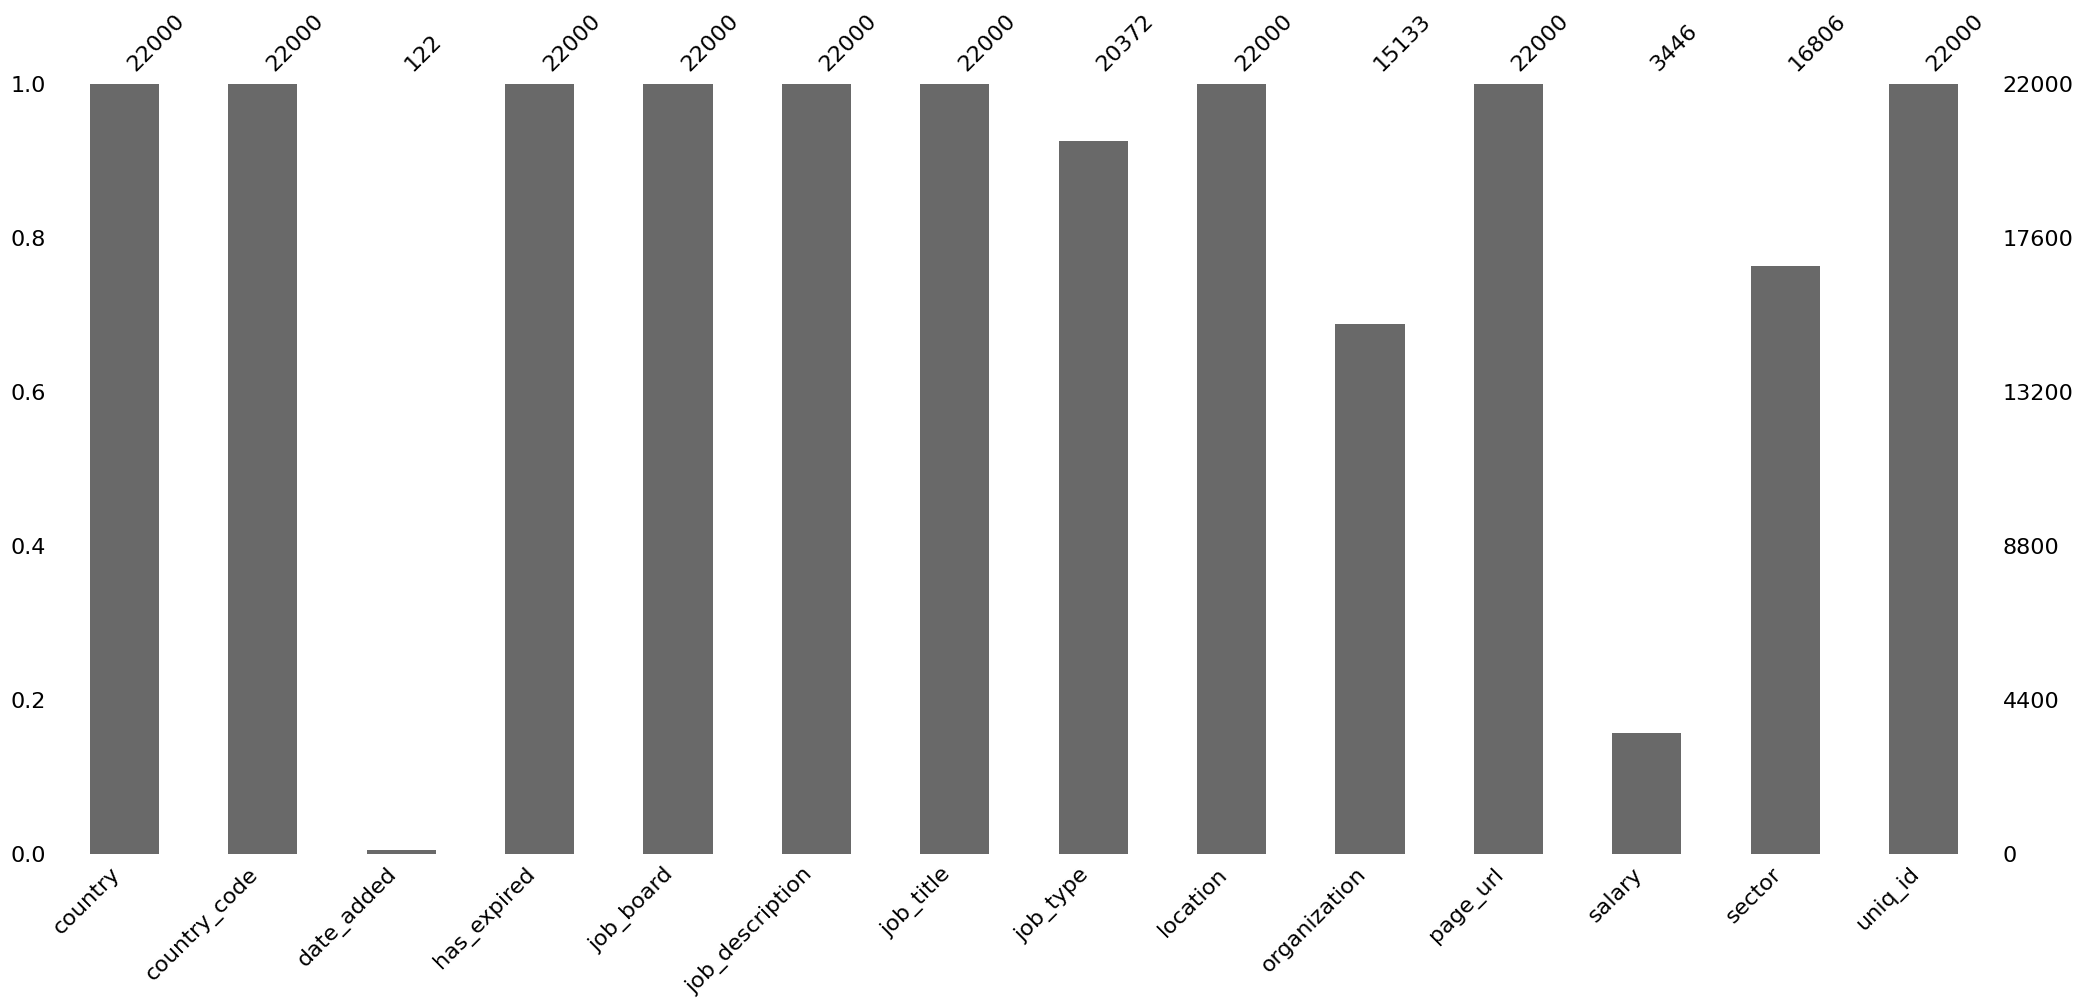

In [ ]:
msno.bar(jobs)

<Axes: >

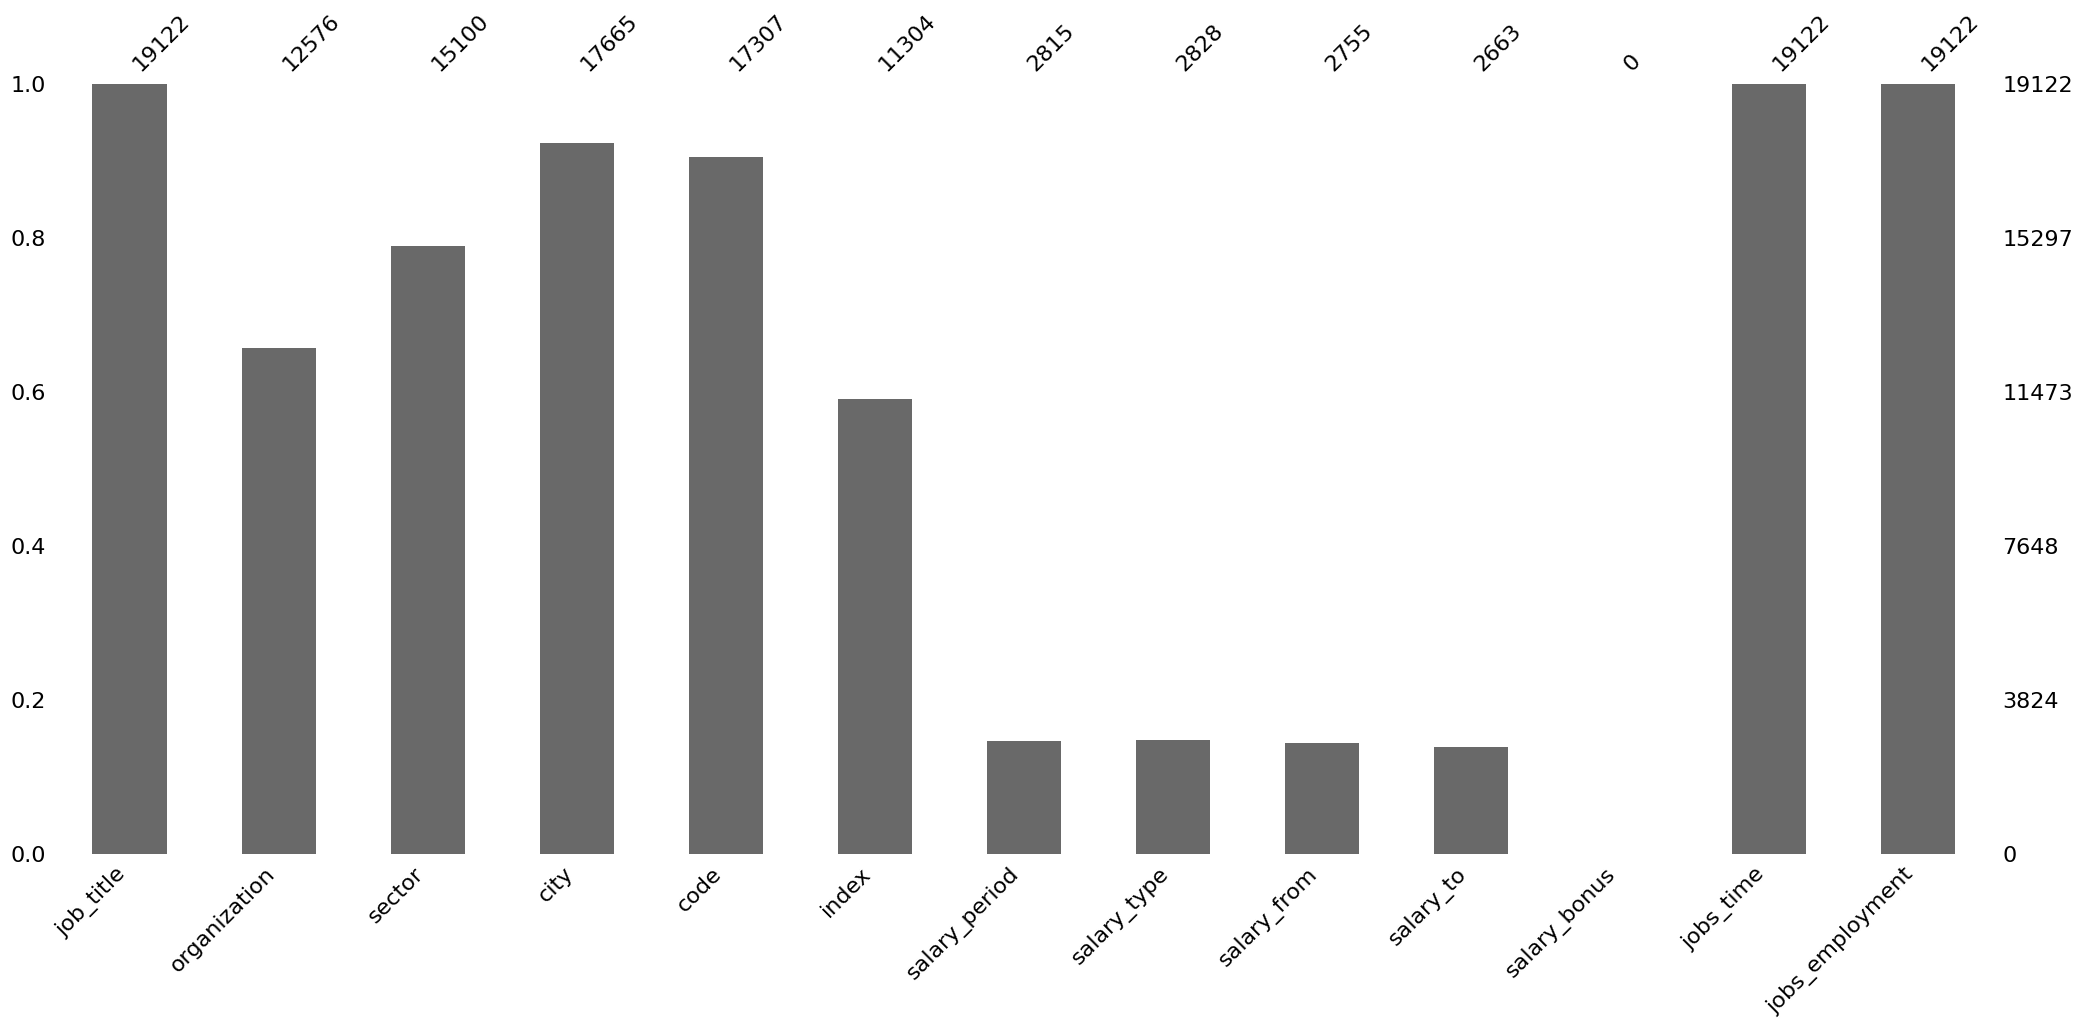

In [ ]:
msno.bar(jobscopy)

После обработки в датасете нет дублирующих строк. Так же нет столбцов, частично или полностью дублирующих информацию друг друга. Стало меньше пропущенных значений. Данные представлены в более удобном и структурированном виде.

С помощью полученных данных можно найти информацию о вакансиях в конкретном городе, штате; определить среднюю зарплату по городу или штату, конечно, можно, но результат будет неточным, так как много пропущенных значений зарплаты; можно определить, в каком регионе наиболее востребованы специалисты по той или иной профессии; определить наиболее частый тип занятости и продолжительность рабочего дня.